# K-Means Clustering
K-Means clustring of dataset by Parth Agrawal 240905088

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv('Clustering_Data.csv')
data=df.copy()
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## K-Means Training of the Model

In [15]:
def z(X):
    #Z score normalisation algorithm. Returns z score normalised dataset, means and std. deviations of the features.
    # find the mean of each n columns
    means     = np.mean(X, axis=0)                 # mean will have length n
    # find the standard deviation of each n columns
    stdevs  = np.std(X, axis=0)+0.00001                 # sigma will have length n. +0.00001 to prevent divide by 0 error.
    X_norm = (X - means) / stdevs    

    return X_norm, means, stdevs

data, means, stddevs = z(data)
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))
def assign_clusters(X, clusters,k):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters
def update_clusters(X, clusters,k):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters
def pred_cluster(X, clusters,k):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred,sum(dist)
def kmeans(X, max_iterations,k):
    distances=[]

    clusters = {}
    np.random.seed(23)

    for idx in range(k):
        center = 2*(2*np.random.random((X.shape[1],))-1)
        points = []
        cluster = {
            'center' : center,
            'points' : []
        }
    
        clusters[idx] = cluster
    plt.scatter(X[:,0],X[:,1])
    plt.grid(True)
    for i in clusters:
       center = clusters[i]['center']
       plt.scatter(center[0],center[1],marker = '*',c = 'red')
    plt.show()

    for i in range(max_iterations):
        clusters = assign_clusters(X,clusters,k)
        clusters = update_clusters(X,clusters,k)
        pred = pred_cluster(X,clusters,k)[0]

        sumofpoints = 0
        for point in X:
            sumofpoints += pred_cluster(X,clusters,k)[1]
        print(f"iter. {i} : sum of distance of all (normalised) points from their nearest centroid: {sumofpoints}")
        distances.append(sumofpoints)
        try:
            if(distances[-1] == distances[-2]):
                print("\n*** The model has reached maximum efficiency. There is no need to run more iterations now. ***\n")
                break
        except:
            continue
    plt.scatter(X[:,0],X[:,1],c = pred)
    for i in clusters:
       center = clusters[i]['center']
       plt.scatter(center[0],center[1],marker = '^',c = 'red')
    plt.show()

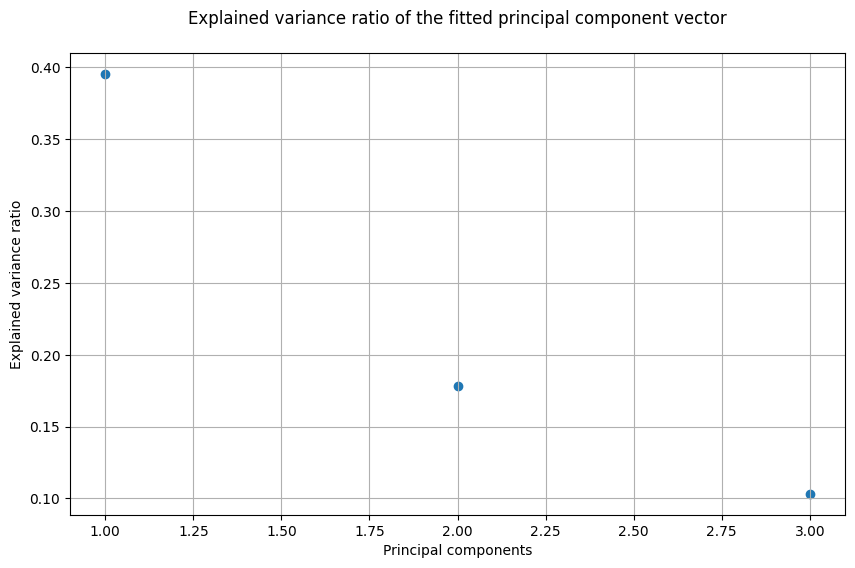

,0,1,2
0,-3.522903,1.453063,-0.164758
1,-2.528822,-0.329996,-2.026720
2,-2.784999,1.036871,0.983224
3,-3.922566,2.768142,-0.174904
4,-1.407510,0.867698,2.025773


In [16]:
pca = PCA(n_components=3)
data_pca = pca.fit(data)

plt.figure(figsize=(10,6))
plt.scatter([i+1 for i in range(len(data_pca.explained_variance_ratio_))],data_pca.explained_variance_ratio_)
plt.grid()
plt.title("Explained variance ratio of the fitted principal component vector\n")
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.show()

data_trans = pca.transform(data)
data_trans = pd.DataFrame(data=data_trans)
data = data_trans
data.head()

# Finding k
Different clusters are giving different sum of variances
lowest is in 3 clusters which is 8.071914406510198

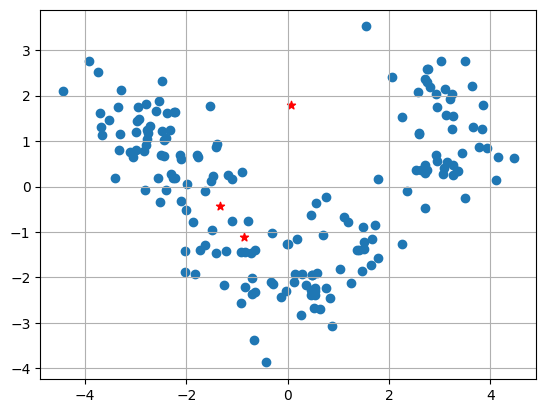

iter. 0 : sum of distance of all (normalised) points from their nearest centroid: 2517.903447255654
iter. 1 : sum of distance of all (normalised) points from their nearest centroid: 2503.9791552403135
iter. 2 : sum of distance of all (normalised) points from their nearest centroid: 2511.7550332186056
iter. 3 : sum of distance of all (normalised) points from their nearest centroid: 2510.1436787004327
iter. 4 : sum of distance of all (normalised) points from their nearest centroid: 2510.1436787004327

*** The model has reached maximum efficiency. There is no need to run more iterations now. ***



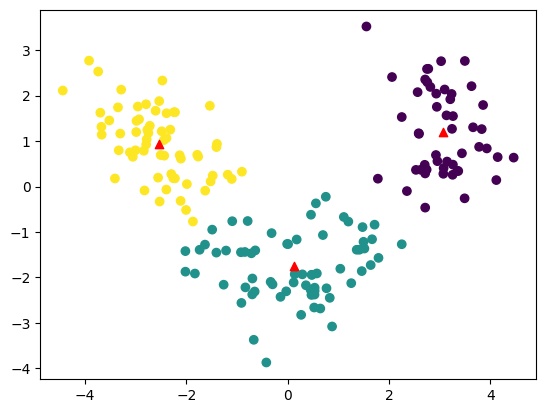

In [17]:
kmeans(data.values,10,3)

# Conclusion
Clustering of data is overlapping one another but there are major three columns so three clusters are formed